# Project: WeRateDogs Wrangling and Analyze Data

## Table of Content

1. Introduction
2. Data Gathering
3. Importing the needed packages
4. Assess Data
5. Data cleaning
6. Data Analysis and Visualization.

## Introduction

   WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. The data "WeRateDogs"  which was downloaded from their Twitter archive and provided by udacity for this project and There is also an additional tsv file and a csv file which contains the tweet_id which was also provided by udacity. These datas which has been filtered to create the enhanced archive data that forms the basis of this analysis. The goal of this project is to wrangle the data ( gather, assess, and clean)  into a tidy dataset, storing and then  analysis will be done on the data.

## Data Gathering

In [1]:
# importing the needed packages
import pandas as pd
import numpy as np
import requests
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
import json
import sys
import time
import re
from tweepy import OAuthHandler
from timeit import default_timer as timer

import warnings
warnings.simplefilter('ignore')


In [2]:
# loading the twitter-archive-enhanced data 
twitter_arc = pd.read_csv('twitter-archive-enhanced.csv')

using  the requests package to download the tsv data from the link provided by Udacity

In [3]:
# downloading The tweet image predictions from the link provided by Udacity
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

Response 200 indicated that download was successful

In [4]:
# storing the tsv file into my local system
image_file = url.split('/')[-1]

with open(os.path.join(image_file,), mode = 'wb') as file:
    file.write(response.content)

In [5]:
# reading the image_file to a dataframe and asign it to a variable called image_prediction 
image_prediction = pd.read_csv(image_file, sep= '\t')

Quary of Twitter's API which was gathered using Python's Tweepy library to get the data and was stored in JSON file provided by udacity. it will be used to get the tweet related data and its save as tweet_json.txt.

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_arc.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

Read the tweet-json.txt data into data frame

In [6]:
#reading the Json.txt file line by line into Pandas DataFrame with tweet_id, retweet_count and favorite_count
df = []
with open('tweet-json.txt', 'r') as Json_file:
    for line in Json_file:
        tweet = (json.loads(line))
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        create_date = tweet['created_at']
        df.append({'retweet_count' : retweet_count,
                  'favorite_count' : favorite_count,
                  'create_date' : create_date,
                  'tweet_id' : tweet_id})
        
#saving the tweet-json.txt file into a dataframe called df_tweet
df_tweet = pd.DataFrame(df, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

## Assess Data

In this section the gathered data will be visually and programmatically assessed for quality and tidiness issues.

### Visual Assesment

In [7]:
#loading twitter-archive dataframe to visual assessment
twitter_arc

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [8]:
# loading image-prediction dataframe for visual assessment
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [9]:
# loading df_tweet to visually assess it
df_tweet

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


### Programmatical Assessment

#### Twitter archive

In [10]:
# programmatically assessing the first five rows of the twitter
twitter_arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
# checking the last five rows
twitter_arc.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [12]:
# checking the twiter archive informations
twitter_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
# checking for null values in retweeted status id
twitter_arc['retweeted_status_id'].isnull().sum()

2175

In [14]:
# checking for duplicated expanded urls
sum(twitter_arc.expanded_urls.duplicated())

137

In [15]:
# checking for duplicated tweet id
sum(twitter_arc.duplicated())

0

In [16]:
#checking the value counts of the name column
twitter_arc['name'].value_counts().head(20)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Buddy        7
Toby         7
an           7
Bailey       7
Leo          6
Oscar        6
Name: name, dtype: int64

In [17]:
# number of tweets with missing urls
sum(twitter_arc.expanded_urls.isna())

59

In [18]:
# assessing the source column
twitter_arc.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [19]:
twitter_arc[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [20]:
#checking the values of the rating_numerator and rating_denominator column
twitter_arc['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [21]:
sum(twitter_arc.rating_numerator >= 15)

28

In [22]:
twitter_arc['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [23]:
sum(twitter_arc.rating_denominator != 10)

23

* Assessing the image prediction data frame

In [24]:
#programmatically assessing the image predction dataframe
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [25]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
#checking the image jpg_url column
image_prediction.jpg_url.value_counts()

https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/CXrmMSpUwAAdeRj.jpg                                            1
https://pbs.twimg.com/media/CXrawAhWkAAWSxC.jpg                                            1
https://pbs.twimg.com/media/CXrIntsUsAEkv0d.jpg                                            1
https://pbs.twimg.com/media/CXqcOHCUQAAugTB.jpg                                            1
https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg                       

This shows that some of the url data are duplicated

In [27]:
#checking to see the row data of any jpg_url that's duplicated
image_prediction[image_prediction['jpg_url'] == 'https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1457,777684233540206592,https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg,1,cocker_spaniel,0.253442,True,golden_retriever,0.16285,True,otterhound,0.110921,True
1619,802624713319034886,https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg,1,cocker_spaniel,0.253442,True,golden_retriever,0.16285,True,otterhound,0.110921,True


In [28]:
#checking the img_num column
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

####  df_tweet file data frame

In [29]:
# cheching df_tweet info
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [30]:
#Programmatically assessing the df_tweet dataframe
df_tweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [31]:
# checking the data discriptions
df_tweet.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [32]:
#checking for null values in df_tweet
sum(df_tweet.sum().isnull())

0

### Quality issues on the data sets

* twitter-archive-enhanced.csv

1. Names column have invalid names like 'None', 'the','quite', 'a', 'an' etc. All valid names start with an uppercase letter, where as these were all lowercase.
2. An object datatype was asign to timestamp column instead of datetime datatype.
3. Retweets are present in the data frame which is not needed in our analysis since our concern is the original tweets and also Reply tweets are not “original tweets” either; this data is stored in the columns in_reply_to_status_id and in_reply_to_user_id.
4. In most of the columns null values were represented as 'None' instead of NaN
5. Some rows have thesame values in the expanded_url column.
6. Tweet_ids are stored as integers instead of strings.
7. Tweet source column has an entire link information and is not reader friendly. eg. instead of "href="http://twitter.com/download/iphone" rel="nofollow"Twitter for iPhone" as source, we need to have only Twitter for iPhone and changing the datatype to category

* image-predictions.tsv

1. Some tweet_ids have the same jpg_url.

 ### Tidiness issues
* twitter-archive-enhanced.csv

1. Dog categories (doggo, floofer, pupper, puppo) are spread in different columns.


* image-predictions.tsv
1. Breed Predictions, Confidence intervals and Dog texts are spread in three columns.


* tweet-json.txt
1. twitter_arc and df_tweet have similar information about the tweet made eg thesame tweet_id. they will be melge

2. join all the data frames together using tweet_ids and performing general cleaning on the data



## Data cleaning

In this section all the observed Quality and tidiness issues in the data will be fixed

In [33]:
# making a copy of the data sets
twitter_arc_clean = twitter_arc.copy()
image_prediction_clean = image_prediction.copy()
df_tweet_clean = df_tweet.copy()

### Issue #1:  Names column have invalid names like 'None', 'the','quite', 'a', 'an' etc. All valid names start with an uppercase letter, where as these were all lowercase.
 #### Define 
  Write a for loop to asess the text column for the missing name of the dog and create a new name column to replace the old name column. Change names with words like 'a', 'an', 'such' to NAN values


#### Code

In [34]:
# Looping through the texts to check for the dog name that are inconsistent. 
#using some sentences that were found to come before the name in the text and check if it matches any of the  conditions
# creating an empty list to append the result to
names = []

for text in twitter_arc_clean['text']:
    # Start with 'This is ' and the first letter of the name is usually uppercase
    if text.startswith('This is ') and re.match(r'[A-Z].*',text.split()[2]):
        names.append(text.split()[2].strip(',').strip('.'))
    # Start with 'Meet ' and the first letter of the name is usually uppercase
    elif text.startswith('Meet ') and re.match(r'[A-Z].*', text.split()[1]):
        names.append(text.split()[1].strip(',').strip('.'))
    # Start with 'Say hello to ' and the first letter of the name is uppercase
    elif text.startswith('Say hello to ') and re.match(r'[A-Z].*', text.split()[3]):
        names.append(text.split()[3].strip(',').strip('.'))
    # Start with 'His name is ' and the first letter of the name is uppercase
    elif text.startswith('His name is ') and re.match(r'[A-Z].*', text.split()[3]):
        names.append(text.split()[3].strip(',').strip('.'))
    # Start with 'Here we have ' and the first letter of the name is uppercase
    elif text.startswith('Here we have ') and re.match(r'[A-Z].*', text.split()[3]):
        names.append(text.split()[3].strip(',').strip('.'))
    # or Contains 'named' and the first letter of the name is uppercase
    elif 'named' in text and re.match(r'[A-Z].*', text.split()[text.split().index('named') + 1]):
        names.append(text.split()[text.split().index('named') + 1].strip(',').strip('.'))
    # No name specified or other style
    else:
        names.append('NaN')

# Test
len(names)

# Save result in a new column 'names'
twitter_arc_clean['names'] = names

In [35]:
# using a for loop to iterate through the new name column for nan and using the existing name in the old name column to fill it
a = twitter_arc_clean['name']
b = twitter_arc_clean['names']
index = a.index
Names=b.values
x=len(b)
for i in range(0, x):
    if Names[i] == 'NaN':
        Names[i] = a[i]

In [36]:
#drop old column name 
twitter_arc_clean = twitter_arc_clean.drop('name', 1)

In [37]:
#replacing names like 'such', 'a' and 'an' with NAN
twitter_arc_clean['names'].replace('such', np.NAN, inplace =True)
twitter_arc_clean['names'].replace('None', np.NAN, inplace =True)
twitter_arc_clean['names'].replace('a', np.NAN, inplace =True)
twitter_arc_clean['names'].replace('an', np.NAN, inplace =True)
twitter_arc_clean['names'].replace('the', np.NAN, inplace =True)

### Test

In [38]:
twitter_arc_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,names
13,889638837579907072,NaN,NaN,2017-07-25 00:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ted. He does his best. Sometimes that'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889638837...,12,10,None,None,None,None,Ted
654,791821351946420224,NaN,NaN,2016-10-28 01:58:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This little fella really hates ...,6.848310e+17,4.196984e+09,2016-01-06 20:16:44 +0000,"https://vine.co/v/eEZXZI1rqxX,https://vine.co/...",13,10,None,None,pupper,None,NaN
1464,694356675654983680,6.706684e+17,4.196984e+09,2016-02-02 03:08:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper only appears through the hole of a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694356675...,10,10,None,None,pupper,None,NaN
526,808838249661788160,NaN,NaN,2016-12-14 00:57:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ito. He'll be your uber driver tonight...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808838249...,13,10,None,None,None,None,Ito
1404,699370870310113280,NaN,NaN,2016-02-15 23:13:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Calbert. He doesn't have enough l...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699370870...,11,10,None,None,None,None,Calbert


In [39]:
#checking names with null values
sum(twitter_arc_clean.names.isna())

789

 ### Issue #2: An object datatype was asign to timestamp column instead of datetime datatype.


#### Define: 

Convert timestamp column from object datatype to_datetime


#### Code

In [40]:
# converting timestamp colomn datatype to datetime
twitter_arc_clean['timestamp'] = pd.to_datetime(twitter_arc_clean['timestamp'])
twitter_arc_clean['retweeted_status_timestamp'] = pd.to_datetime(twitter_arc_clean['retweeted_status_timestamp'])

#### Test

In [41]:
twitter_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #3: Retweets are present in the data frame which is not needed in our analysis since our concern is the original tweets and also Reply tweets are not “original tweets” either; this data is stored in the columns in_reply_to_status_id and in_reply_to_user_id

#### Define

dropping retweets column from the dataset as we will be only concerned with the original tweets and 
also drop the retweeted_status_id, retweeted_status_user and retweeted_status_timestamp, in_reply_to_status_id and in_reply_to_user_id


#### Code

In [42]:
#remove the retweets and replies
twitter_arc_clean = twitter_arc_clean[twitter_arc_clean.retweeted_status_id.isnull()]
twitter_arc_clean = twitter_arc_clean[twitter_arc_clean.retweeted_status_user_id.isnull()]
twitter_arc_clean = twitter_arc_clean[twitter_arc_clean.retweeted_status_timestamp.isnull()]
twitter_arc_clean = twitter_arc_clean[twitter_arc_clean.in_reply_to_status_id.isnull()]
twitter_arc_clean = twitter_arc_clean[twitter_arc_clean.in_reply_to_user_id.isnull()]


In [43]:
twitter_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

In [44]:
twitter_arc_clean.drop(columns=['retweeted_status_id', 
                                'retweeted_status_user_id',
                                'in_reply_to_status_id',
                                'in_reply_to_user_id',
                                'retweeted_status_timestamp'], inplace= True)

### Test

In [45]:
list(twitter_arc_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'names']

In [46]:
twitter_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   doggo               2097 non-null   object             
 8   floofer             2097 non-null   object             
 9   pupper              2097 non-null   object             
 10  puppo               2097 non-null   object             
 11  names               1449 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Issue #4: In most of the columns null values were represented as 'None' instead of NaN

#### Define

Changing values in twitter_arc_clean dataframe columns from None to NaN in name, doggo, floofer, pupper, puppo



#### Code

In [47]:
twitter_arc_clean['names'].replace('None', np.NAN, inplace =True)
twitter_arc_clean['doggo'].replace('None', np.NAN, inplace =True)
twitter_arc_clean['floofer'].replace('None', np.NAN, inplace =True)
twitter_arc_clean['pupper'].replace('None', np.NAN, inplace =True)
twitter_arc_clean['puppo'].replace('None', np.NAN, inplace =True)

### Issue #5: Some rows have thesame values in the expanded_urls

####  Define
Removing duplicated values from the expanded_urls

####  Code

In [48]:
twitter_arc_clean.drop_duplicates(subset= 'expanded_urls', inplace = True)

#### Test

In [49]:
sum(twitter_arc_clean.expanded_urls.duplicated())

0

### Issue #6: Tweet_ids are stored as integers instead of strings.


####  Define
changing the tweet_id from int to string datatype
####  Code

In [50]:
twitter_arc_clean['tweet_id'] = twitter_arc_clean['tweet_id'].astype(object)
image_prediction_clean['tweet_id'] = image_prediction_clean['tweet_id'].astype(object)
df_tweet_clean['tweet_id'] = df_tweet_clean['tweet_id'].astype(object)

#### Test

In [51]:
twitter_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   object             
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2093 non-null   object             
 5   rating_numerator    2094 non-null   int64              
 6   rating_denominator  2094 non-null   int64              
 7   doggo               83 non-null     object             
 8   floofer             10 non-null     object             
 9   pupper              229 non-null    object             
 10  puppo               24 non-null     object             
 11  names               1449 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

### Issue #7: Tweet source column has an entire link information and is not reader friendly. eg. instead of "href="http://twitter.com/download/iphone" rel="nofollow"Twitter for iPhone" as source, we need to have only Twitter for iPhone and changing the datatype to category


#### Define

Extract the tweet-source information from the source column. eg. so that it will only display **Twitter for iPhone**

#### Code

In [52]:
# Extracting the souce present at the end of each string
twitter_arc_clean.source= twitter_arc_clean.source.str.split('>', expand= True)[1].str.split('</', expand= True)[0]

In [53]:
# changing the datatype to category
twitter_arc_clean.source= twitter_arc_clean.source.astype('category')

#### Test

In [54]:
#checking for the changed source column
twitter_arc_clean.source.value_counts()

Twitter for iPhone     1962
Vine - Make a Scene      90
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

In [55]:
twitter_arc_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,names
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,NaN,NaN,NaN,NaN,Phineas
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,NaN,NaN,NaN,NaN,Tilly
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,NaN,NaN,NaN,NaN,Archie
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,NaN,NaN,NaN,NaN,Darla
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,NaN,NaN,NaN,NaN,Franklin


In [56]:
twitter_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   object             
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   category           
 3   text                2094 non-null   object             
 4   expanded_urls       2093 non-null   object             
 5   rating_numerator    2094 non-null   int64              
 6   rating_denominator  2094 non-null   int64              
 7   doggo               83 non-null     object             
 8   floofer             10 non-null     object             
 9   pupper              229 non-null    object             
 10  puppo               24 non-null     object             
 11  names               1449 non-null   object             
dtypes: category(1), datetime64[ns, UTC

* image-predictions.tsv

### Issue #8: Some tweet_ids have the same jpg_url.


 #### Define
    
  drop tweet_ids which have duplicate jpg_url
    
#### Code

In [57]:
image_prediction_clean.drop_duplicates(subset ='jpg_url', inplace = True)

#### Test

In [58]:
sum(image_prediction_clean.jpg_url.duplicated())

0

In [59]:
twitter_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   object             
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   category           
 3   text                2094 non-null   object             
 4   expanded_urls       2093 non-null   object             
 5   rating_numerator    2094 non-null   int64              
 6   rating_denominator  2094 non-null   int64              
 7   doggo               83 non-null     object             
 8   floofer             10 non-null     object             
 9   pupper              229 non-null    object             
 10  puppo               24 non-null     object             
 11  names               1449 non-null   object             
dtypes: category(1), datetime64[ns, UTC

### Tidiness issues
* twitter-archive-enhanced.csv

### Issue #1: Dog stages (doggo, floofer, pupper, puppo) are spread in different columns.


#### define

place the four dog categories (floofer,pupper,puppo,doggo) into a single column using melt method

#### code

In [60]:
#melting the columns
twitter_arc_clean = pd.melt(twitter_arc_clean, id_vars=['tweet_id','timestamp', 'source','text','expanded_urls', 'rating_numerator', 'rating_denominator','names'],
                         value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], var_name='dog_categories', value_name='categories')
twitter_arc_clean= twitter_arc_clean.drop('dog_categories', axis=1)
twitter_arc_clean.categories.value_counts()
#Filter for unique values then remove duplicate values based on 'categories' values count
twitter_arc_clean = twitter_arc_clean.sort_values('categories').drop_duplicates('tweet_id', keep = 'first')

#### Test

In [61]:
twitter_arc_clean.categories.value_counts()

pupper     220
doggo       83
puppo       23
floofer      9
Name: categories, dtype: int64

In [62]:
twitter_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 9 to 2093
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   object             
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   category           
 3   text                2094 non-null   object             
 4   expanded_urls       2093 non-null   object             
 5   rating_numerator    2094 non-null   int64              
 6   rating_denominator  2094 non-null   int64              
 7   names               1449 non-null   object             
 8   categories          335 non-null    object             
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 149.5+ KB


* tweet-json.txt

### Issue #2: twitter_arc and df_tweet have similar information about the tweet made eg thesame tweet_id. they will be melge


In [63]:
twitter_arc_clean = pd.merge(twitter_arc_clean, df_tweet_clean, on = 'tweet_id', how = 'left')

#### Test

In [64]:
twitter_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2093
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   object             
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   category           
 3   text                2094 non-null   object             
 4   expanded_urls       2093 non-null   object             
 5   rating_numerator    2094 non-null   int64              
 6   rating_denominator  2094 non-null   int64              
 7   names               1449 non-null   object             
 8   categories          335 non-null    object             
 9   retweet_count       2094 non-null   int64              
 10  favorite_count      2094 non-null   int64              
dtypes: category(1), datetime64[ns, UTC](1), int64(4), object(5)
memory usage: 182.2+ KB


### Tidiness Issues

* image-predictions.tsv

### Issue #1: Breed Predictions, Confidence intervals and Dog texts are spread in three columns


#### Define

Creating two new columns in image predictions dataframe called dog_breed and confidence by checking each dog breed prediction and copying the breed with the highest confidence level into the new breed column. Also, copy the associated confidence level into the new confidence column. For cases where all 3 predictions are False (NOT a valid dog breed), dog_breed will be set as NAN and confidence to 0 and previous multiple columns will be dropped

#### Code

In [65]:
# the conditions for selection when it is a dog
conditions = [(image_prediction_clean['p1_dog'] == True),
              (image_prediction_clean['p2_dog'] == True),
              (image_prediction_clean['p3_dog'] == True)]

# the choice order based on the selection conditions for predicted breed
breeds = [image_prediction_clean['p1'], 
        image_prediction_clean['p2'],
        image_prediction_clean['p3']]

# the choice order for confidence level based on the selection conditions
confidence_level = [image_prediction_clean['p1_conf'], 
                    image_prediction_clean['p2_conf'], 
                    image_prediction_clean['p3_conf']]

# selecting the predicted dog breed based on the first successful condition and placing in new dog breed column
image_prediction_clean['breed'] = np.select(conditions, breeds, default = 'none')


# selecting the predicted confidence level based on the first successful condition and placing into new confidence column
image_prediction_clean['confidence'] = np.select(conditions, confidence_level, default = 0)

#droping previous prediction and confidence level columns

image_prediction_clean.drop(columns=['p1', 'p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], inplace= True)

In [66]:
#replace none as NaN in dog breed 
image_prediction_clean['breed'].replace('none', np.NAN, inplace =True)

# dropping NaN value from dog breed column
image_prediction_clean.dropna(subset=['breed'], how = 'all',inplace= True)

#### Test

In [67]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    1691 non-null   object 
 1   jpg_url     1691 non-null   object 
 2   img_num     1691 non-null   int64  
 3   breed       1691 non-null   object 
 4   confidence  1691 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 79.3+ KB


### Issue #3: join all the data frames together using tweet_ids

### Define
 Merge twitter_arc_clean and image_prediction_clean data frame together using tweet_id and clean

### Code

In [68]:
#merging twitter_arc_clean and image_prediction_clean data frame
all_tweets =pd.merge(twitter_arc_clean, image_prediction_clean,  on ='tweet_id', how = 'inner')

In [69]:
all_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1665
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1666 non-null   object             
 1   timestamp           1666 non-null   datetime64[ns, UTC]
 2   source              1666 non-null   category           
 3   text                1666 non-null   object             
 4   expanded_urls       1666 non-null   object             
 5   rating_numerator    1666 non-null   int64              
 6   rating_denominator  1666 non-null   int64              
 7   names               1231 non-null   object             
 8   categories          257 non-null    object             
 9   retweet_count       1666 non-null   int64              
 10  favorite_count      1666 non-null   int64              
 11  jpg_url             1666 non-null   object             
 12  img_num             1666 non-null 

In [70]:
#dropping duplicates
all_tweets = all_tweets.drop_duplicates()

In [71]:
all_tweets.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,names,categories,retweet_count,favorite_count,jpg_url,img_num,breed,confidence
0,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,7711,32467,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319
1,757393109802180609,2016-07-25 01:52:43+00:00,Twitter for iPhone,Here's a doggo completely oblivious to the dou...,https://twitter.com/dog_rates/status/757393109...,10,10,NaN,doggo,2009,6462,https://pbs.twimg.com/media/CoLNAq6WAAAkmdJ.jpg,2,Labrador_retriever,0.787125
2,758828659922702336,2016-07-29 00:57:05+00:00,Twitter for iPhone,This doggo is just waiting for someone to be p...,https://twitter.com/dog_rates/status/758828659...,13,10,NaN,doggo,4376,12376,https://pbs.twimg.com/media/Cofmom_VUAA4dRO.jpg,1,Chesapeake_Bay_retriever,0.480048
3,759793422261743616,2016-07-31 16:50:42+00:00,Twitter for iPhone,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,2173,6620,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,2,golden_retriever,0.985876
4,760893934457552897,2016-08-03 17:43:45+00:00,Twitter for iPhone,This is Wishes. He has the day off. Daily stru...,https://twitter.com/dog_rates/status/760893934...,11,10,Wishes,doggo,1104,4228,https://pbs.twimg.com/media/Co88_ujWEAErCg7.jpg,1,Blenheim_spaniel,0.113992


In [72]:
#dropping expanded_urls and jpg_ur column 
all_tweets = all_tweets.drop('expanded_urls', axis = 1)

In [73]:
#create rating column
all_tweets['rating'] = all_tweets['rating_numerator'].astype(str) + '/'+ all_tweets['rating_denominator'].astype(str)

In [74]:
#drop columns
all_tweets.drop(['rating_numerator', 'rating_denominator'], axis =1, inplace= True)

In [75]:
# checking the columns names
col_list = list(all_tweets.columns)
col_list

['tweet_id',
 'timestamp',
 'source',
 'text',
 'names',
 'categories',
 'retweet_count',
 'favorite_count',
 'jpg_url',
 'img_num',
 'breed',
 'confidence',
 'rating']

In [89]:
# rearranging the columns in desired orders
col_list = ['tweet_id', 'timestamp', 'retweet_count', 'favorite_count',
            'breed', 'confidence', 'names', 'categories', 'source', 'rating', 'img_num', 'text']

all_tweets = all_tweets[col_list]

In [77]:
all_tweets.head(3)

,tweet_id,timestamp,rating,retweet_count,favorite_count,breed,confidence,names,categories,source,img_num,text
0,890240255349198849,2017-07-26 15:59:51+00:00,14/10,7711,32467,Pembroke,0.511319,Cassie,doggo,Twitter for iPhone,1,This is Cassie. She is a college pup. Studying...
1,757393109802180609,2016-07-25 01:52:43+00:00,10/10,2009,6462,Labrador_retriever,0.787125,NaN,doggo,Twitter for iPhone,2,Here's a doggo completely oblivious to the dou...
2,758828659922702336,2016-07-29 00:57:05+00:00,13/10,4376,12376,Chesapeake_Bay_retriever,0.480048,NaN,doggo,Twitter for iPhone,1,This doggo is just waiting for someone to be p...


In [78]:
all_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1665
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1666 non-null   object             
 1   timestamp       1666 non-null   datetime64[ns, UTC]
 2   rating          1666 non-null   object             
 3   retweet_count   1666 non-null   int64              
 4   favorite_count  1666 non-null   int64              
 5   breed           1666 non-null   object             
 6   confidence      1666 non-null   float64            
 7   names           1231 non-null   object             
 8   categories      257 non-null    object             
 9   source          1666 non-null   category           
 10  img_num         1666 non-null   int64              
 11  text            1666 non-null   object             
dtypes: category(1), datetime64[ns, UTC](1), float64(1), int64(3), object(6)
memory usage: 158.

In [80]:
# changing retweet_count,favorite_count and confidence datatypes to int.
all_tweets['retweet_count'] = all_tweets['retweet_count'].apply(np.int64)
all_tweets['favorite_count'] = all_tweets['favorite_count'].apply(np.int64)

In [81]:
# checking
all_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1665
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1666 non-null   object             
 1   timestamp       1666 non-null   datetime64[ns, UTC]
 2   rating          1666 non-null   object             
 3   retweet_count   1666 non-null   int64              
 4   favorite_count  1666 non-null   int64              
 5   breed           1666 non-null   object             
 6   confidence      1666 non-null   float64            
 7   names           1231 non-null   object             
 8   categories      257 non-null    object             
 9   source          1666 non-null   category           
 10  img_num         1666 non-null   int64              
 11  text            1666 non-null   object             
dtypes: category(1), datetime64[ns, UTC](1), float64(1), int64(3), object(6)
memory usage: 158.

## Storing the data


Exporting the all_tweets dataframe to a csv file called 'twitter_archive_master.csv'

In [82]:
#Storing the all_tweets dataset into a csv file
all_tweets.to_csv('twitter_archive_master.csv', index=False )

## Data Analysis and Visualization

In this section the data will be analysed using the cleaned master_data to draw an insight 

### Insights

1. What are the most common dog names
2. what is the correlation between retweets and favorites
3. which breeds has the most retweet_count
4. What is the most common dog breed
5. What are the most common tweet sources
6. Which  dog categories are the most common?
7. Which breeds of dog has the highest overall favourite counts


In [83]:
all_tweets = all_tweets.copy()

In [84]:
all_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1665
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1666 non-null   object             
 1   timestamp       1666 non-null   datetime64[ns, UTC]
 2   rating          1666 non-null   object             
 3   retweet_count   1666 non-null   int64              
 4   favorite_count  1666 non-null   int64              
 5   breed           1666 non-null   object             
 6   confidence      1666 non-null   float64            
 7   names           1231 non-null   object             
 8   categories      257 non-null    object             
 9   source          1666 non-null   category           
 10  img_num         1666 non-null   int64              
 11  text            1666 non-null   object             
dtypes: category(1), datetime64[ns, UTC](1), float64(1), int64(3), object(6)
memory usage: 158.

In [85]:
all_tweets.describe()

,retweet_count,favorite_count,confidence,img_num
count,1666.000000,1666.000000,1666.000000,1666.000000
mean,2834.429772,9288.184274,0.551571,1.214286
std,4831.960790,12641.538890,0.298923,0.573959
min,16.000000,81.000000,0.000010,1.000000
25%,650.500000,2176.000000,0.305955,1.000000
50%,1440.500000,4464.000000,0.550914,1.000000
75%,3261.000000,11734.750000,0.822939,1.000000
max,79515.000000,132810.000000,0.999956,4.000000


In [86]:
all_tweets.head()

,tweet_id,timestamp,rating,retweet_count,favorite_count,breed,confidence,names,categories,source,img_num,text
0,890240255349198849,2017-07-26 15:59:51+00:00,14/10,7711,32467,Pembroke,0.511319,Cassie,doggo,Twitter for iPhone,1,This is Cassie. She is a college pup. Studying...
1,757393109802180609,2016-07-25 01:52:43+00:00,10/10,2009,6462,Labrador_retriever,0.787125,NaN,doggo,Twitter for iPhone,2,Here's a doggo completely oblivious to the dou...
2,758828659922702336,2016-07-29 00:57:05+00:00,13/10,4376,12376,Chesapeake_Bay_retriever,0.480048,NaN,doggo,Twitter for iPhone,1,This doggo is just waiting for someone to be p...
3,759793422261743616,2016-07-31 16:50:42+00:00,12/10,2173,6620,golden_retriever,0.985876,Maggie,doggo,Twitter for iPhone,2,"Meet Maggie &amp; Lila. Maggie is the doggo, L..."
4,760893934457552897,2016-08-03 17:43:45+00:00,11/10,1104,4228,Blenheim_spaniel,0.113992,Wishes,doggo,Twitter for iPhone,1,This is Wishes. He has the day off. Daily stru...


In [87]:
all_tweets.tail()

,tweet_id,timestamp,rating,retweet_count,favorite_count,breed,confidence,names,categories,source,img_num,text
1661,666049248165822465,2015-11-16 00:24:50+00:00,5/10,41,111,miniature_pinscher,0.560311,NaN,NaN,Twitter for iPhone,1,Here we have a 1949 1st generation vulpix. Enj...
1662,666044226329800704,2015-11-16 00:04:52+00:00,6/10,147,311,Rhodesian_ridgeback,0.408143,NaN,NaN,Twitter for iPhone,1,This is a purebred Piers Morgan. Loves to Netf...
1663,666033412701032449,2015-11-15 23:21:54+00:00,9/10,47,128,German_shepherd,0.596461,NaN,NaN,Twitter for iPhone,1,Here is a very happy pup. Big fan of well-main...
1664,666029285002620928,2015-11-15 23:05:30+00:00,7/10,48,132,redbone,0.506826,NaN,NaN,Twitter for iPhone,1,This is a western brown Mitsubishi terrier. Up...
1665,666020888022790149,2015-11-15 22:32:08+00:00,8/10,532,2535,Welsh_springer_spaniel,0.465074,NaN,NaN,Twitter for iPhone,1,Here we have a Japanese Irish Setter. Lost eye...


1. What are the most common dog names

In [90]:
all_tweets.names.value_counts().nlargest(5)

Lucy       10
Cooper     10
Charlie    10
Oliver      9
Tucker      9
Name: names, dtype: int64

2. what is the correlation between retweets and favorites

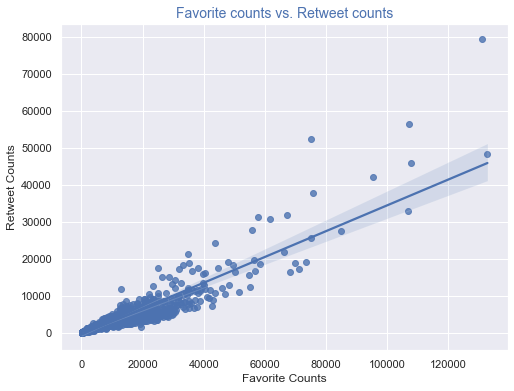

In [91]:
sns.set(rc={'figure.figsize':(8,6)})
sns.regplot( x='favorite_count', y='retweet_count', data=all_tweets)

plt.title('Favorite counts vs. Retweet counts',color='b', size=14)
plt.ylabel('Retweet Counts', size=12)
plt.xlabel('Favorite Counts', size=12);


In [92]:
all_tweets[['retweet_count','favorite_count']].corr().iloc[0,1]

0.9132839144048364

3. Breeds that has the highest  retweets 

In [93]:
breed_ret = all_tweets.groupby('breed')['retweet_count'].sum().nlargest(5)
breed_ret

breed
golden_retriever      586657
Labrador_retriever    405404
Pembroke              291771
Chihuahua             250722
Samoyed               203446
Name: retweet_count, dtype: int64

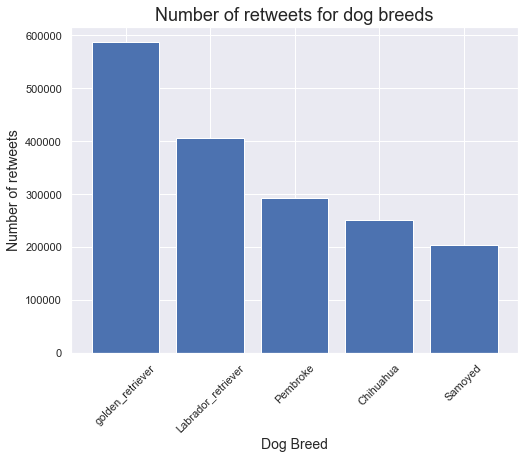

In [94]:
plt.bar(x= breed_ret.index, height= breed_ret,)
plt.xticks(rotation=45)
plt.xlabel('Dog Breed', fontsize=14)
plt.ylabel('Number of retweets', fontsize=14)
plt.title('Number of retweets for dog breeds',  fontsize=18);

4. What is the most common dog breed

In [95]:
all_tweets.breed.value_counts().head(5)

golden_retriever      156
Labrador_retriever    106
Pembroke               94
Chihuahua              90
pug                    62
Name: breed, dtype: int64

5. What are the most common tweet sources

In [96]:
all_tweets.source.value_counts(ascending = False)

Twitter for iPhone     1635
Twitter Web Client       22
TweetDeck                 9
Vine - Make a Scene       0
Name: source, dtype: int64

6.  Which  dog categories are the most common?

In [97]:
all_tweets.categories.value_counts()

pupper     166
doggo       63
puppo       21
floofer      7
Name: categories, dtype: int64

7. Which  breeds of dog has the highest overall favourite counts 

In [98]:
fav_breed = all_tweets.groupby('breed')['favorite_count'].sum().sort_values(ascending = False).head(10)

In [99]:
fav_breed

breed
golden_retriever      1943782
Labrador_retriever    1265355
Pembroke              1038797
Chihuahua              743689
Samoyed                583906
French_bulldog         570921
chow                   446933
cocker_spaniel         407412
pug                    383817
toy_poodle             337270
Name: favorite_count, dtype: int64

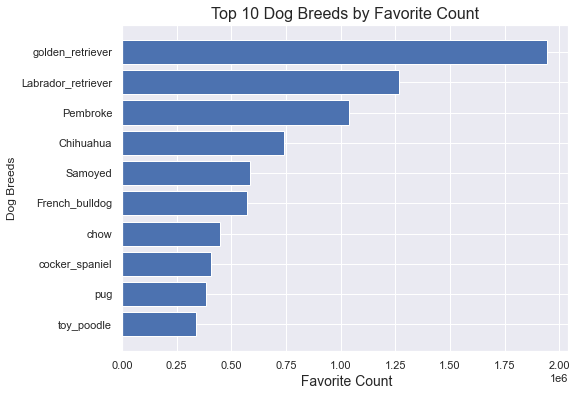

In [100]:
plt.barh(fav_breed.index, fav_breed, color = 'b')

plt.xlabel(' Favorite Count', fontsize = 14)
plt.ylabel('Dog Breeds', fontsize = 12)
plt.title('Top 10 Dog Breeds by Favorite Count', fontsize = 16)
plt.gca().invert_yaxis()
plt.show();